In [2]:
import numpy as np
import pandas as pd
import time

In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())
print("\nColumn information:")
print(df.info())
print("\nPurchase distribution:")
print(df['Purchased'].value_counts())
print("\nBasic statistics:")
print(df.describe())

Dataset shape: (400, 5)

First few rows:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Column names:
['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Purchase distribution:
Purchased
0    257
1    143
Name: count, dtyp

In [11]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
df = df[['Age','EstimatedSalary','Purchased']]


In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled.shape

(400, 2)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (320, 2)
Test set shape: (80, 2)
Training labels shape: (320,)
Test labels shape: (80,)


In [23]:
X_train.shape

(320, 2)

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Raghav\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(X_scaled,y,epochs=5,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9062 - loss: 0.2731 - val_accuracy: 0.9500 - val_loss: 0.1678
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9094 - loss: 0.2718 - val_accuracy: 0.9500 - val_loss: 0.1741
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9094 - loss: 0.2680 - val_accuracy: 0.9500 - val_loss: 0.1789
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.2761 - val_accuracy: 0.9375 - val_loss: 0.1754
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.2728 - val_accuracy: 0.9375 - val_loss: 0.1713


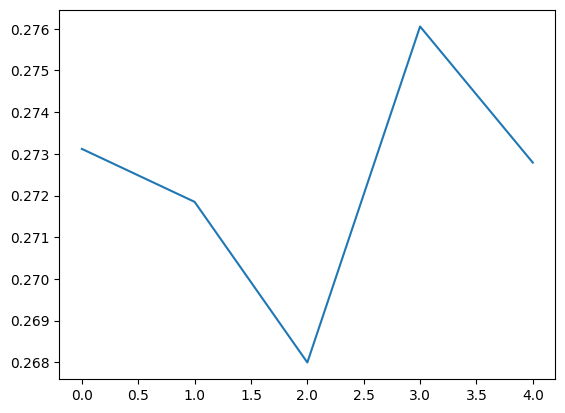

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [30]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
print(time.time() - start)

Epoch 1/10


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.6781 - loss: 0.6374 - val_accuracy: 0.6000 - val_loss: 0.7643
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6938 - loss: 0.6255 - val_accuracy: 0.6000 - val_loss: 0.7628
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6969 - loss: 0.6171 - val_accuracy: 0.6250 - val_loss: 0.7608
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7188 - loss: 0.6103 - val_accuracy: 0.6250 - val_loss: 0.7576
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7219 - loss: 0.6042 - val_accuracy: 0.6250 - val_loss: 0.7512
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7281 - loss: 0.5986 - val_accuracy: 0.6250 - val_loss: 0.7459
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7437 - loss: 0.5932 - val_accuracy: 0.6250 - val_loss: 0.7401
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7500 - loss: 0.5878 - val_accuracy: 0.6250 - val_loss: 0.7358
Epoch 9/10

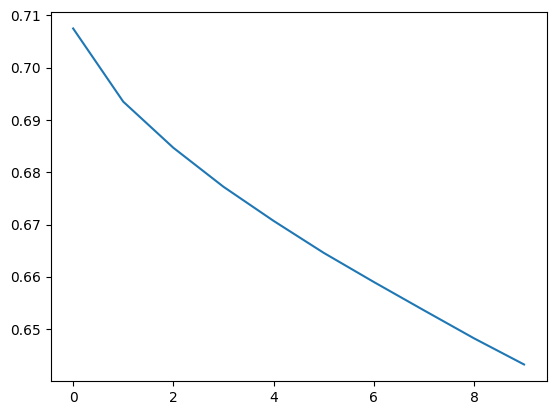

In [32]:
plt.plot(history.history['loss'])